In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install pygad scikit-fuzzy torchviz ga --quiet

In [2]:
data=pd.read_csv(r"C:\Users\Deepu\Soft Computing Project\SD3\data.csv",sep='\t')
data.head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,N1,...,P2,P3,P4,P5,P6,P7,P8,P9,country,source
0,4,4,4,4,4,4,4,3,4,2,...,4,3,2,4,4,4,4,4,GB,1
1,2,1,5,2,2,1,2,2,3,1,...,1,1,5,4,1,5,3,2,US,1
2,3,3,3,5,1,1,5,5,3,2,...,5,3,1,3,1,2,3,1,US,1
3,5,5,4,5,5,5,5,5,5,5,...,1,5,2,5,5,5,1,5,GB,3
4,4,4,2,5,5,5,4,1,4,3,...,5,3,1,4,3,5,4,1,GB,3


In [3]:
question_cols = data.columns[:-2]
tech_cols = ['source', 'country']  # technical information
data[question_cols] = data[question_cols].apply(pd.to_numeric, errors='coerce')
X = data[question_cols].values

In [4]:
question_cols

Index(['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'N1', 'N2', 'N3',
       'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6',
       'P7', 'P8', 'P9'],
      dtype='object')

In [5]:
X

array([[4, 4, 4, ..., 4, 4, 4],
       [2, 1, 5, ..., 5, 3, 2],
       [3, 3, 3, ..., 2, 3, 1],
       ...,
       [4, 3, 3, ..., 2, 4, 1],
       [5, 4, 3, ..., 4, 1, 3],
       [4, 4, 4, ..., 3, 4, 4]], dtype=int64)

In [46]:
# Visualize the model architecture using torchviz
import torch
from torchviz import make_dot

# Create a dummy input tensor with the same number of features as the PCA-reduced data.
dummy_input = torch.randn(1, X_reduced.shape[1])  # shape: (1, input_dim)
model_output = model(dummy_input)

# Generate a graph of the model.
dot = make_dot(model_output, params=dict(list(model.named_parameters())))
dot.render("ANFIS_model_architecture", format="png")  # This will save 'ANFIS_model_architecture.png'


'ANFIS_model_architecture.png'

Epoch 1/20 — Train Loss: 1.0248, Val Loss: 0.8529
Epoch 2/20 — Train Loss: 0.7048, Val Loss: 0.6375
Epoch 3/20 — Train Loss: 0.5863, Val Loss: 0.5652
Epoch 4/20 — Train Loss: 0.5368, Val Loss: 0.5302
Epoch 5/20 — Train Loss: 0.4915, Val Loss: 0.4722
Epoch 6/20 — Train Loss: 0.4101, Val Loss: 0.3883
Epoch 7/20 — Train Loss: 0.3433, Val Loss: 0.3352
Epoch 8/20 — Train Loss: 0.2976, Val Loss: 0.2946
Epoch 9/20 — Train Loss: 0.2646, Val Loss: 0.2626
Epoch 10/20 — Train Loss: 0.2385, Val Loss: 0.2378
Epoch 11/20 — Train Loss: 0.2163, Val Loss: 0.2143
Epoch 12/20 — Train Loss: 0.1962, Val Loss: 0.1973
Epoch 13/20 — Train Loss: 0.1798, Val Loss: 0.1836
Epoch 14/20 — Train Loss: 0.1701, Val Loss: 0.1718
Epoch 15/20 — Train Loss: 0.1642, Val Loss: 0.1674
Epoch 16/20 — Train Loss: 0.1594, Val Loss: 0.1635
Epoch 17/20 — Train Loss: 0.1547, Val Loss: 0.1568
Epoch 18/20 — Train Loss: 0.1504, Val Loss: 0.1504
Epoch 19/20 — Train Loss: 0.1463, Val Loss: 0.1473
Epoch 20/20 — Train Loss: 0.1436, Val Lo

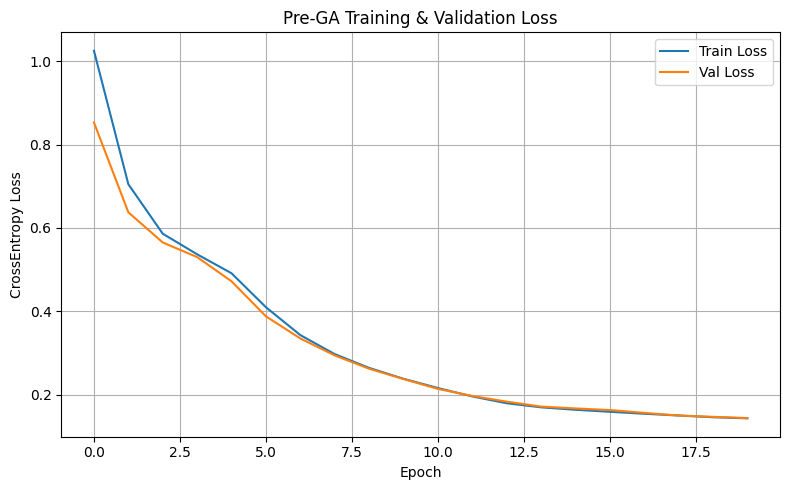

In [40]:
# Cell 1: Pre‑GA Training & Evaluation (3‑class)

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1) Data Loading & Preprocessing
data = pd.read_csv(r"C:\Users\Deepu\Soft Computing Project\SD3\data.csv", sep='\t')
question_cols = [f"M{i}" for i in range(1,10)] + [f"N{i}" for i in range(1,10)] + [f"P{i}" for i in range(1,10)]
data[question_cols] = data[question_cols].apply(pd.to_numeric, errors='coerce')
data = data.dropna(subset=question_cols)
X = data[question_cols].values
X_norm = (X - 1) / 4.0  # scale to [0,1]

# 2) PCA & Pseudo‑labels
pca = PCA(n_components=9)
X_reduced = pca.fit_transform(X_norm)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
pseudo_labels = kmeans.fit_predict(X_reduced)  # integers 0,1,2

# Torch tensors
X_t = torch.tensor(X_reduced, dtype=torch.float32)
y_t = torch.tensor(pseudo_labels, dtype=torch.long)  # shape [N]

# 3) ANFIS Model Definition (now output_dim=3)
class FuzzyLayer(nn.Module):
    def __init__(self, input_dim, num_mfs=2):
        super().__init__()
        self.centers = nn.Parameter(torch.rand(input_dim, num_mfs))
        self.sigmas  = nn.Parameter(torch.rand(input_dim, num_mfs))

    def forward(self, x):
        # x: [B, F]
        x_exp = x.unsqueeze(2)                      # [B, F, 1]
        return torch.exp(- (x_exp - self.centers)**2
                         / (2 * self.sigmas**2 + 1e-6))  # [B, F, M]

class RuleLayer(nn.Module):
    def forward(self, x):
        # flatten all fuzzy memberships into rule strengths
        return x.view(x.size(0), -1)  # [B, F*M]

class ConsequentLayer(nn.Module):
    def __init__(self, num_rules, output_dim=3):
        super().__init__()
        # each rule has a vector of consequents (one per class)
        self.consequents = nn.Parameter(torch.rand(num_rules, output_dim))

    def forward(self, x):
        # x: [B, num_rules]
        norm = x / (x.sum(1, keepdim=True) + 1e-6)  # normalize rule activations
        return norm @ self.consequents              # [B, output_dim]

class ANFIS(nn.Module):
    def __init__(self, input_dim, num_mfs=2, output_dim=3):
        super().__init__()
        self.fuzzy  = FuzzyLayer(input_dim, num_mfs)
        self.rule   = RuleLayer()
        self.conseq = ConsequentLayer(input_dim * num_mfs, output_dim)

    def forward(self, x):
        return self.conseq(self.rule(self.fuzzy(x)))  # raw logits

# 4) Train/Test Split
n = X_t.size(0)
perm = torch.randperm(n)
split = int(0.8 * n)
train_idx, val_idx = perm[:split], perm[split:]
X_train, y_train = X_t[train_idx], y_t[train_idx]
X_val,   y_val   = X_t[val_idx],   y_t[val_idx]

# 5) Model, Loss, Optimizer
model = ANFIS(input_dim=9, num_mfs=2, output_dim=3)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# 6) Training Loop
epochs = 20
batch_size = 16
train_losses, val_losses = [], []

for ep in range(epochs):
    model.train()
    epoch_loss = 0
    idxs = torch.randperm(X_train.size(0))
    for i in range(0, X_train.size(0), batch_size):
        batch = idxs[i:i+batch_size]
        xb, yb = X_train[batch], y_train[batch]
        optimizer.zero_grad()
        logits = model(xb)                   # [B,3]
        loss = criterion(logits, yb)         # CrossEntropy
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * xb.size(0)
    train_losses.append(epoch_loss / len(train_idx))

    # validation
    model.eval()
    with torch.no_grad():
        val_logits = model(X_val)
        val_loss = criterion(val_logits, y_val).item()
        val_losses.append(val_loss)

    print(f"Epoch {ep+1}/{epochs} — Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_loss:.4f}")

# 7) Pre‑GA Evaluation Metrics
model.eval()
with torch.no_grad():
    # train acc
    train_logits = model(X_train)
    train_pred   = train_logits.argmax(dim=1)
    acc_train    = accuracy_score(y_train.numpy(), train_pred.numpy())
    # val acc
    val_pred     = model(X_val).argmax(dim=1)
    acc_val      = accuracy_score(y_val.numpy(), val_pred.numpy())

print("\nPre‑GA Metrics:")
print(f"  Train Acc: {acc_train*100:.2f}%")
print(f"  Val   Acc: {acc_val*100:.2f}%")

# 8) Plot Loss Curves
plt.figure(figsize=(8,5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses,   label='Val Loss')
plt.title("Pre‑GA Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("CrossEntropy Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Pre‑GA — Train Acc: 0.9516, Val Acc: 0.9508
Gen 1/60 — Best Val Acc: 0.9508
Gen 2/60 — Best Val Acc: 0.9525
Gen 3/60 — Best Val Acc: 0.9538
Gen 4/60 — Best Val Acc: 0.9538
Gen 5/60 — Best Val Acc: 0.9538
Gen 6/60 — Best Val Acc: 0.9538
Gen 7/60 — Best Val Acc: 0.9538
Gen 8/60 — Best Val Acc: 0.9547
Gen 9/60 — Best Val Acc: 0.9547
Gen 10/60 — Best Val Acc: 0.9547
Gen 11/60 — Best Val Acc: 0.9571
Gen 12/60 — Best Val Acc: 0.9632
Gen 13/60 — Best Val Acc: 0.9632
Gen 14/60 — Best Val Acc: 0.9632
Gen 15/60 — Best Val Acc: 0.9632
Gen 16/60 — Best Val Acc: 0.9632
Gen 17/60 — Best Val Acc: 0.9632
Gen 18/60 — Best Val Acc: 0.9632
Gen 19/60 — Best Val Acc: 0.9632
Gen 20/60 — Best Val Acc: 0.9665
Gen 21/60 — Best Val Acc: 0.9665
Gen 22/60 — Best Val Acc: 0.9678
Gen 23/60 — Best Val Acc: 0.9678
Gen 24/60 — Best Val Acc: 0.9678
Gen 25/60 — Best Val Acc: 0.9678
Gen 26/60 — Best Val Acc: 0.9678
Gen 27/60 — Best Val Acc: 0.9678
Gen 28/60 — Best Val Acc: 0.9678
Gen 29/60 — Best Val Acc: 0.9692
Gen 30/6

,Metric,Pre‑GA,Post‑GA
0,Train Acc,0.951556,0.967498
1,Val Acc,0.950811,0.974444


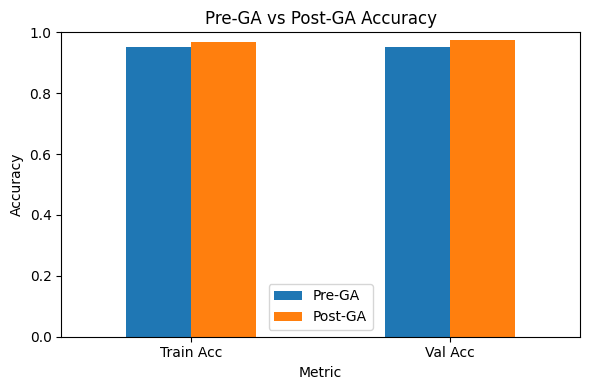

In [41]:
# Cell 2: GA Optimization & Post‑GA Evaluation (3‑class)

import numpy as np
import torch
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# 1) Helpers to flatten / set model parameters
def get_flat(model):
    return np.concatenate([p.detach().cpu().numpy().ravel() for p in model.parameters()])

def set_flat(model, arr):
    ptr = 0
    for p in model.parameters():
        num = p.numel()
        vals = arr[ptr:ptr+num].reshape(p.shape)
        p.data = torch.tensor(vals, dtype=p.data.dtype)
        ptr += num

# 2) Recompute Pre‑GA metrics (so we can compare later)
model.eval()
with torch.no_grad():
    train_logits = model(X_train)
    train_pred   = train_logits.argmax(dim=1)
    acc_train_pre = accuracy_score(y_train.numpy(), train_pred.numpy())
    val_logits   = model(X_val)
    val_pred     = val_logits.argmax(dim=1)
    acc_val_pre   = accuracy_score(y_val.numpy(),   val_pred.numpy())

print(f"Pre‑GA — Train Acc: {acc_train_pre:.4f}, Val Acc: {acc_val_pre:.4f}")

# 3) GA Hyperparameters
pop_size, gens = 100, 60
mut_rate, cross_rate = 0.2, 0.7

base = get_flat(model)
dim  = base.shape[0]
pop  = np.array([base + np.random.randn(dim)*0.05 for _ in range(pop_size)])

# 4) Fitness: validation accuracy
def fitness(sol):
    set_flat(model, sol)
    model.eval()
    with torch.no_grad():
        logits = model(X_val)
        pred   = logits.argmax(dim=1).cpu().numpy()
    return accuracy_score(y_val.numpy(), pred)

# 5) Evolution Loop
best_fit, best_sol = -1.0, None

for g in range(1, gens+1):
    fits = np.array([fitness(ind) for ind in pop])
    idx  = fits.argmax()
    if fits[idx] > best_fit:
        best_fit, best_sol = fits[idx], pop[idx].copy()

    # Tournament selection (size=3)
    selected = []
    for _ in range(pop_size):
        tour = np.random.choice(pop_size, 3, replace=False)
        winner = tour[fits[tour].argmax()]
        selected.append(pop[winner])
    sel = np.array(selected)

    # Crossover & Mutation
    new_pop = []
    for i in range(0, pop_size, 2):
        p1, p2 = sel[i], sel[(i+1) % pop_size]
        # single‑point crossover
        if np.random.rand() < cross_rate:
            pt = np.random.randint(1, dim)
            c1 = np.concatenate([p1[:pt], p2[pt:]])
            c2 = np.concatenate([p2[:pt], p1[pt:]])
        else:
            c1, c2 = p1.copy(), p2.copy()
        # mutation
        for c in (c1, c2):
            mask = np.random.rand(dim) < mut_rate
            c[mask] += np.random.randn(mask.sum()) * 0.1
        new_pop += [c1, c2]

    pop = np.array(new_pop[:pop_size])
    print(f"Gen {g}/{gens} — Best Val Acc: {best_fit:.4f}")

# 6) Apply best solution and evaluate
set_flat(model, best_sol)
model.eval()
with torch.no_grad():
    # train accuracy
    logits_tr = model(X_train)
    pred_tr   = logits_tr.argmax(dim=1)
    acc_train_post = accuracy_score(y_train.numpy(), pred_tr.numpy())
    # val accuracy
    logits_val = model(X_val)
    pred_val   = logits_val.argmax(dim=1)
    acc_val_post   = accuracy_score(y_val.numpy(),   pred_val.numpy())

print(f"\nPost‑GA — Train Acc: {acc_train_post:.4f}, Val Acc: {acc_val_post:.4f}")

# 7) Comparison Table
comparison = pd.DataFrame({
    'Metric':   ['Train Acc', 'Val Acc'],
    'Pre‑GA':   [acc_train_pre,   acc_val_pre],
    'Post‑GA':  [acc_train_post,  acc_val_post]
})
print("\nPre vs Post GA Comparison:")
display(comparison)

# 8) Plot Comparison
comparison.set_index('Metric')[['Pre‑GA','Post‑GA']].plot.bar(
    figsize=(6,4), rot=0
)
plt.title("Pre‑GA vs Post‑GA Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.tight_layout()
plt.show()


In [42]:
from graphviz import Digraph

def visualize_anfis_architecture(input_dim, num_mfs, output_dim):
    dot = Digraph(format='png')
    dot.attr(rankdir='LR', size='10')

    # Input layer
    dot.node('Input', f'Input\n({input_dim})')

    # Fuzzy Layer
    for i in range(input_dim):
        for j in range(num_mfs):
            dot.node(f'μ_{i}_{j}', f'μ_{i}_{j}\n(Gaussian MF)', shape='ellipse')
            dot.edge('Input', f'μ_{i}_{j}')

    # Rule Layer
    dot.node('RuleLayer', 'Rule Layer\n(Combine MFs)', shape='box')
    for i in range(input_dim):
        for j in range(num_mfs):
            dot.edge(f'μ_{i}_{j}', 'RuleLayer')

    # Consequent Layer
    dot.node('ConsequentLayer', f'Consequent Layer\n({input_dim*num_mfs} rules)', shape='box')
    dot.edge('RuleLayer', 'ConsequentLayer')

    # Output
    dot.node('Output', f'Output\n({output_dim})', shape='doublecircle')
    dot.edge('ConsequentLayer', 'Output')

    dot.render('anfis_block_diagram', view=True)

visualize_anfis_architecture(input_dim=3, num_mfs=2, output_dim=3)


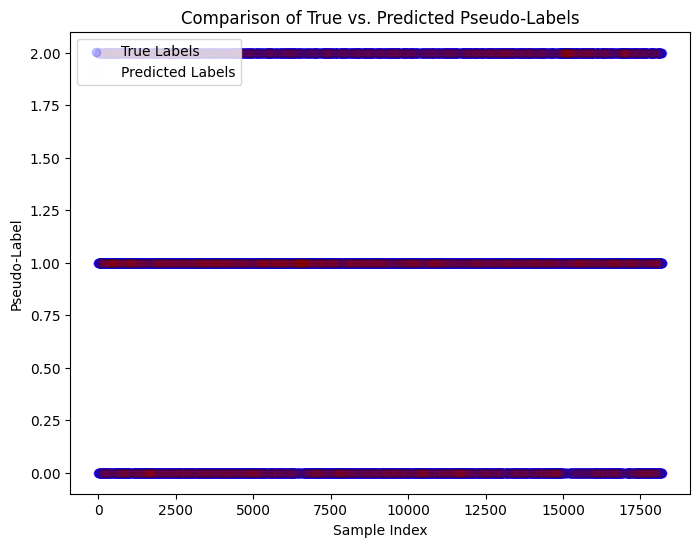

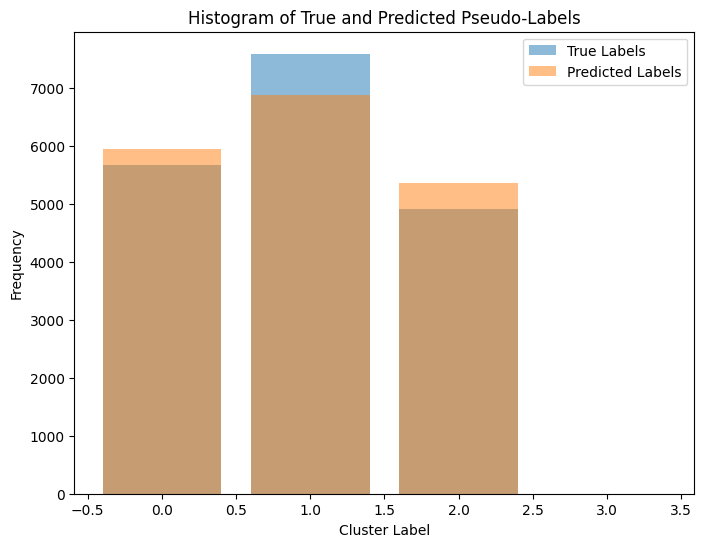

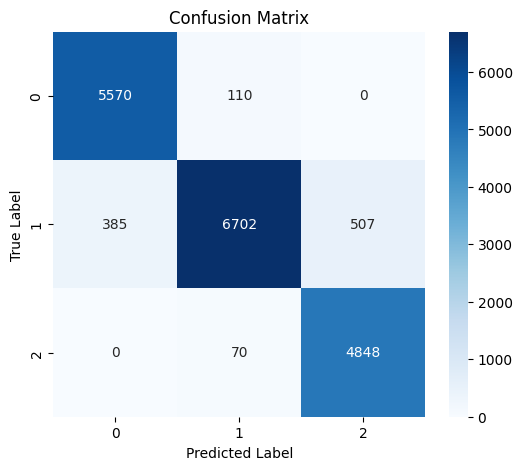

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# After running your model evaluation, suppose you have:
# y_true_labels: true pseudo-labels as integers
# y_pred_labels: model predictions (rounded to nearest integer)

# Scatter plot: Predicted vs. True Pseudo-Labels
plt.figure(figsize=(8,6))
plt.scatter(range(len(y_true_labels)), y_true_labels, color='blue', label='True Labels', alpha=0.2)
plt.scatter(range(len(y_pred_labels)), y_pred_labels, color='red', label='Predicted Labels', alpha=0.008)
plt.xlabel("Sample Index")
plt.ylabel("Pseudo-Label")
plt.title("Comparison of True vs. Predicted Pseudo-Labels")
plt.legend()
plt.show()

# Histogram of Predictions vs. True Labels
plt.figure(figsize=(8,6))
plt.hist(y_true_labels, bins=np.arange(-0.5, 4, 1), alpha=0.5, label='True Labels', rwidth=0.8)
plt.hist(y_pred_labels, bins=np.arange(-0.5, 4, 1), alpha=0.5, label='Predicted Labels', rwidth=0.8)
plt.xlabel("Cluster Label")
plt.ylabel("Frequency")
plt.title("Histogram of True and Predicted Pseudo-Labels")
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
